In [1]:
import os
os.getcwd()

'/home/azhasc'

In [2]:
#hide
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

/home/azhasc/anaconda3/lib/python3.8/site-packages/fastbook/__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [4]:
dir_path = os.getcwd()+"/bing_image_downloader/dataset/dog/husky dog/"
d={}
files = os.listdir(dir_path)
for each_file in files:
    if each_file.endswith("jpg"):
        d[each_file] = open(dir_path+each_file,"rb")


## This is just for husky

In [5]:

#get the image files from the dir
fol = get_image_files(dir_path)

#verify which files are corrupted
failed = verify_images(fol)

#unlink corrupt ones
failed.map(Path.unlink);



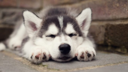

In [6]:
#open one image and check

im = Image.open(fol[1])
im.to_thumb(128,128)

In [7]:
dog_types = 'husky', 'german shepherd', 'labrador'

dir_path_1 = os.getcwd()+"/bing_image_downloader/dataset/dog/"


## This is for all dogs

In [8]:
fns = get_image_files(dir_path_1)

failed1 = verify_images(fns)

failed1.map(Path.unlink);

In [9]:
dogs = DataBlock(
        blocks = (ImageBlock, CategoryBlock),
        get_items = get_image_files,
        splitter = RandomSplitter(valid_pct=0.2,seed=42),
        get_y = parent_label,
        item_tfms = Resize(128),
        )

In [10]:
dls = dogs.dataloaders(dir_path_1)

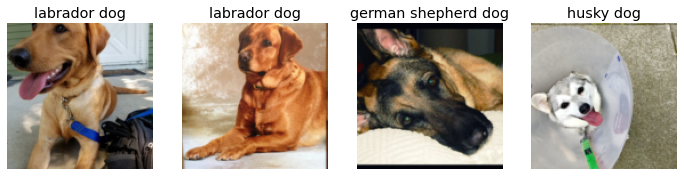

In [11]:
dls.valid.show_batch(max_n=4, nrows=1)

## Resize methods ( eg: Squish, Pad, etc)

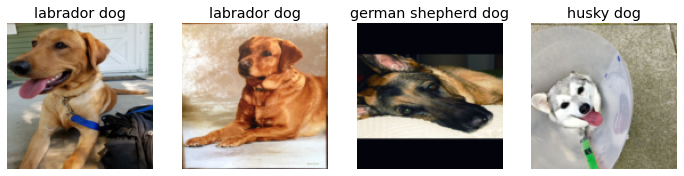

In [35]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dogs.dataloaders(dir_path_1)
dls.valid.show_batch(max_n=4, nrows=1)

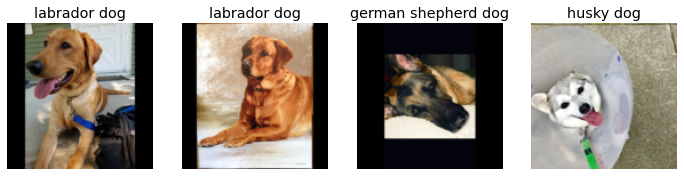

In [36]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dogs.dataloaders(dir_path_1)
dls.valid.show_batch(max_n=4, nrows=1)

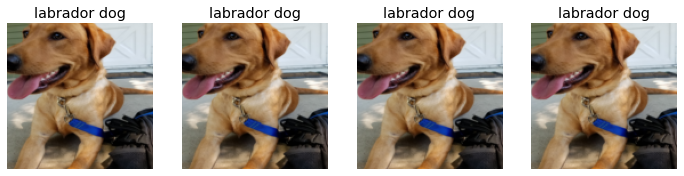

In [37]:
dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dogs.dataloaders(dir_path_1)
dls.valid.show_batch(max_n=4, nrows=1, unique = True)

## Data Augmentation

/home/azhasc/anaconda3/lib/python3.8/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


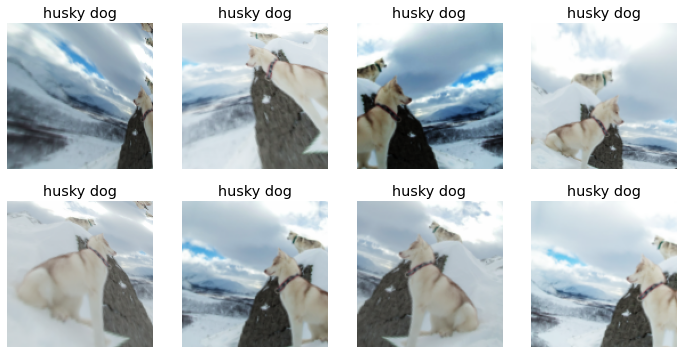

In [12]:
dogs = dogs.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult = 2))
dls = dogs.dataloaders(dir_path_1)
dls.train.show_batch(max_n = 8, nrows = 2, unique = True)

In [13]:
dogs = dogs.new(item_tfms = RandomResizedCrop(224, min_scale=0.5), batch_tfms = aug_transforms())
dls = dogs.dataloaders(dir_path_1)

In [14]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

/home/azhasc/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.482130,0.568960,0.186441,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.707176,0.256969,0.067797,00:09
1,0.506453,0.178729,0.067797,00:09
2,0.355222,0.185957,0.067797,00:09
3,0.280111,0.191892,0.084746,00:08


## Confusion Matrix

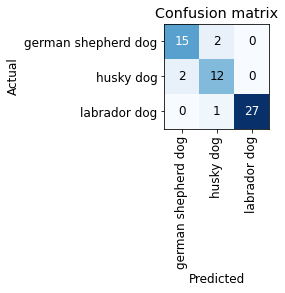

In [15]:
inter = ClassificationInterpretation.from_learner(learn)
inter.plot_confusion_matrix()

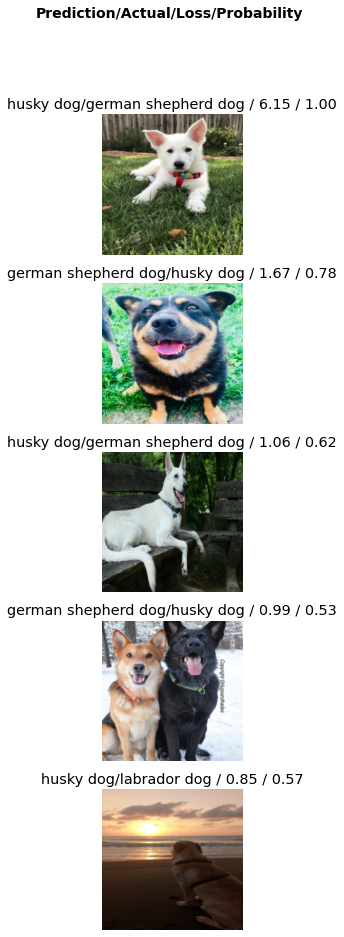

In [16]:
inter.plot_top_losses(5,nrows=5)

In [17]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [18]:
learn.export()

In [19]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [20]:
learn_inf = load_learner(path/'export.pkl')

In [21]:
learn_inf.predict('husky.jpg')

('husky dog', tensor(1), tensor([4.3616e-05, 9.9993e-01, 2.6553e-05]))

In [22]:
learn_inf.dls.vocab

['german shepherd dog', 'husky dog', 'labrador dog']

In [23]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [24]:

btn_upload = SimpleNamespace(data = ['husky.jpg'])

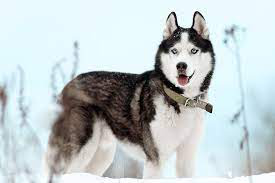

In [25]:
img = PILImage.create(btn_upload.data[-1])
img

In [26]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [27]:
pred,pred_idx,probs = learn_inf.predict(img)

In [28]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: husky dog; Probability: 0.9999')

In [29]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

We'll also need a *click event handler*; that is, a function that will be called when it's pressed. We can just copy over the lines of code from above:

In [30]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [31]:
btn_upload = widgets.FileUpload()

In [32]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [33]:
!pip install voila 
!jupyter serverextension enable voila --sys-prefix

Enabling: voila
- Writing config: /home/azhasc/anaconda3/etc/jupyter
    - Validating...
      voila 0.2.11 OK
